In [1]:
# Import the dependncies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of ranfom latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f042a66e4fc943f36e6796902f729a9c


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saleaula
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | requena
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | finnsnes
Processing Record 7 of Set 1 | kyabram
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | byron bay
Processing Record 10 of Set 1 | mersing
Processing Record 11 of Set 1 | puksoozero
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | preobrazheniye
Processing Record 16 of Set 1 | aliwal north
Processing Record 17 of Set 1 | muzhi
Processing Record 18 of Set 1 | tupiza
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | alamosa
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | mataura
Processing Re

Processing Record 35 of Set 4 | saldanha
Processing Record 36 of Set 4 | nuuk
Processing Record 37 of Set 4 | kawalu
Processing Record 38 of Set 4 | aflu
City not found. Skipping...
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | samdari
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | lewiston
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | saquena
Processing Record 45 of Set 4 | kamaishi
Processing Record 46 of Set 4 | arman
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | bonthe
Processing Record 49 of Set 4 | barreirinha
Processing Record 50 of Set 4 | meulaboh
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | taltal
Processing Record 3 of Set 5 | marshall
Processing Record 4 of Set 5 | ushtobe
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | illela
Processing Record 8 of Set 5

Processing Record 25 of Set 8 | ancud
Processing Record 26 of Set 8 | kurtamysh
Processing Record 27 of Set 8 | padang
Processing Record 28 of Set 8 | naze
Processing Record 29 of Set 8 | bolitoc
Processing Record 30 of Set 8 | teguldet
Processing Record 31 of Set 8 | aasiaat
Processing Record 32 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 33 of Set 8 | novolvovsk
City not found. Skipping...
Processing Record 34 of Set 8 | tashtagol
Processing Record 35 of Set 8 | solnechnyy
Processing Record 36 of Set 8 | westerland
Processing Record 37 of Set 8 | mwanza
Processing Record 38 of Set 8 | victoria
Processing Record 39 of Set 8 | boa vista
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | lasa
Processing Record 43 of Set 8 | te anau
Processing Record 44 of Set 8 | cam pha
City not found. Skipping...
Processing Record 45 of Set 8 | outlook
Processing Record 46 of Set 8 | atasu
Proces

Processing Record 12 of Set 12 | monastyryshche
Processing Record 13 of Set 12 | tocopilla
Processing Record 14 of Set 12 | ponta do sol
Processing Record 15 of Set 12 | krasnodon
Processing Record 16 of Set 12 | najran
Processing Record 17 of Set 12 | chau doc
Processing Record 18 of Set 12 | tir pol
City not found. Skipping...
Processing Record 19 of Set 12 | lahaina
Processing Record 20 of Set 12 | bargal
City not found. Skipping...
Processing Record 21 of Set 12 | tucuman
Processing Record 22 of Set 12 | novobirilyussy
Processing Record 23 of Set 12 | umm durman
City not found. Skipping...
Processing Record 24 of Set 12 | elliot
Processing Record 25 of Set 12 | mambolo
Processing Record 26 of Set 12 | kachikau
City not found. Skipping...
Processing Record 27 of Set 12 | olafsvik
Processing Record 28 of Set 12 | mezen
Processing Record 29 of Set 12 | tigre
Processing Record 30 of Set 12 | tomatlan
Processing Record 31 of Set 12 | nsanje
Processing Record 32 of Set 12 | slave lake
Pr

In [9]:
len(city_data)

556

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,80.01,60,0,3.85,US,2020-05-27 01:51:32
1,Punta Arenas,-53.15,-70.92,42.80,81,40,12.75,CL,2020-05-27 01:53:40
2,Requena,39.49,-1.10,57.00,71,0,4.32,ES,2020-05-27 01:56:13
3,Fortuna,40.60,-124.16,60.01,87,1,14.99,US,2020-05-27 01:56:13
4,Finnsnes,69.23,17.98,44.60,65,100,13.87,NO,2020-05-27 01:54:21
5,Kyabram,-36.32,145.05,57.00,79,66,1.01,AU,2020-05-27 01:56:13
6,Kapaa,22.08,-159.32,80.60,74,75,11.41,US,2020-05-27 01:56:13
7,Byron Bay,-28.65,153.62,70.00,68,90,9.17,AU,2020-05-27 01:56:13
8,Mersing,2.43,103.84,78.80,94,40,2.24,MY,2020-05-27 01:56:13
9,Puksoozero,62.59,40.61,44.80,87,0,2.26,RU,2020-05-27 01:56:13


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-05-27 01:51:32,42.60,-73.97,80.01,60,0,3.85
1,Punta Arenas,CL,2020-05-27 01:53:40,-53.15,-70.92,42.80,81,40,12.75
2,Requena,ES,2020-05-27 01:56:13,39.49,-1.10,57.00,71,0,4.32
3,Fortuna,US,2020-05-27 01:56:13,40.60,-124.16,60.01,87,1,14.99
4,Finnsnes,NO,2020-05-27 01:54:21,69.23,17.98,44.60,65,100,13.87
5,Kyabram,AU,2020-05-27 01:56:13,-36.32,145.05,57.00,79,66,1.01
6,Kapaa,US,2020-05-27 01:56:13,22.08,-159.32,80.60,74,75,11.41
7,Byron Bay,AU,2020-05-27 01:56:13,-28.65,153.62,70.00,68,90,9.17
8,Mersing,MY,2020-05-27 01:56:13,2.43,103.84,78.80,94,40,2.24
9,Puksoozero,RU,2020-05-27 01:56:13,62.59,40.61,44.80,87,0,2.26


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/26/20'

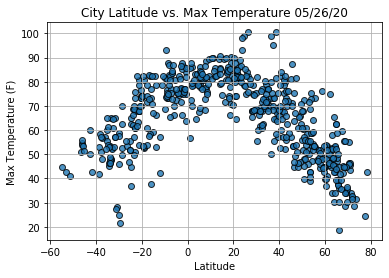

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

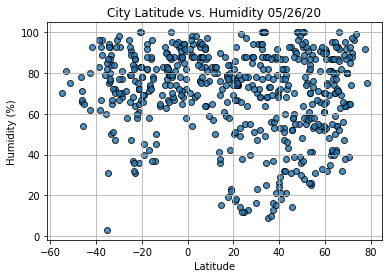

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

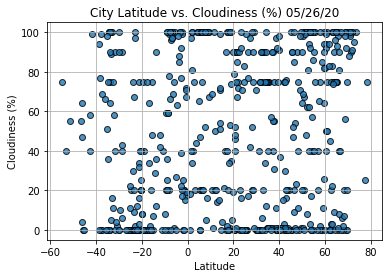

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

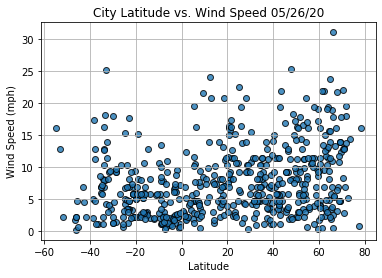

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City               Preobrazheniye
Country                        RU
Date          2020-05-27 01:56:14
Lat                          42.9
Lng                        133.91
Max Temp                    55.78
Humidity                       79
Cloudiness                     16
Wind Speed                   2.55
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
551     True
552     True
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-05-27 01:51:32,42.60,-73.97,80.01,60,0,3.85
2,Requena,ES,2020-05-27 01:56:13,39.49,-1.10,57.00,71,0,4.32
3,Fortuna,US,2020-05-27 01:56:13,40.60,-124.16,60.01,87,1,14.99
4,Finnsnes,NO,2020-05-27 01:54:21,69.23,17.98,44.60,65,100,13.87
6,Kapaa,US,2020-05-27 01:56:13,22.08,-159.32,80.60,74,75,11.41
...,...,...,...,...,...,...,...,...,...
551,San Cristobal,VE,2020-05-27 01:57:08,7.77,-72.22,68.45,92,100,4.03
552,Aksarka,RU,2020-05-27 01:57:08,66.56,67.80,41.86,63,40,5.39
553,Tezu,IN,2020-05-27 01:57:08,27.92,96.17,65.43,85,100,4.27
554,Nautla,MX,2020-05-27 01:57:08,20.22,-96.78,81.64,82,79,2.98


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

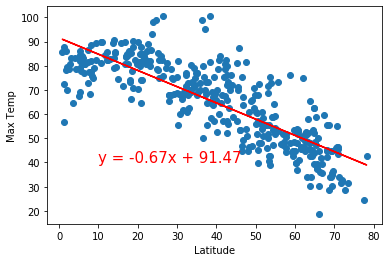

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

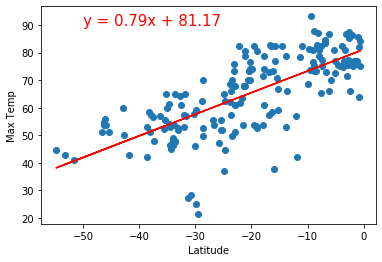

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

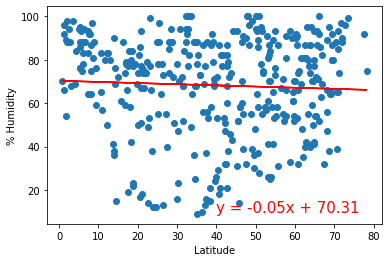

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

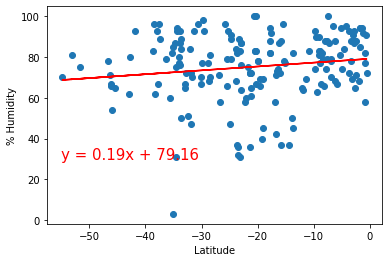

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,30))

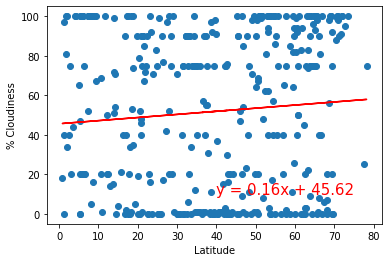

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

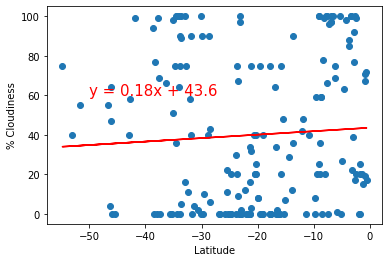

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

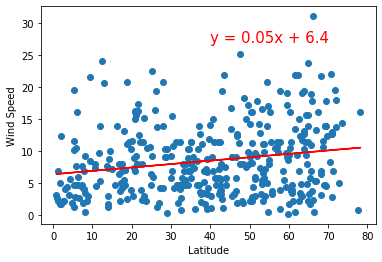

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,27))

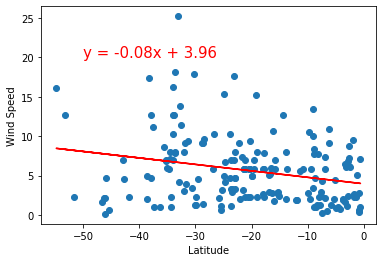

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))